In [1]:
import sys, os

import pandas as pd

sys.path.append(os.path.abspath(os.path.join('..', '..',)))

import autonormalize as an

In [2]:
crime_df = pd.read_csv(os.path.abspath(os.path.join('..','..', 'autonormalize/downloads/crime.csv')))
crime_df = crime_df.drop(columns=crime_df.columns[10:])
crime_df = crime_df.dropna()
crime_df = crime_df.drop_duplicates()
print("Rows: "+ str(crime_df.shape[0]))
print("Columns: " + str(crime_df.shape[1]))
crime_df.head(3)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Rows: 638454
Columns: 10


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter


In [3]:
deps_approx = an.find_dependencies(crime_df, 0.94)
print(deps_approx)

100%|██████████| 9/9 [10:13<00:00, 96.86s/it] 

 --> Record ID
 {State,Agency Name}  {Record ID}  {Agency Type,Agency Name}  {Year,Month,Agency Name}  {City,Agency Name}  --> Agency Code
 {Agency Code}  {Record ID}  --> Agency Name
 {Agency Code}  {Agency Name}  {Record ID}  --> Agency Type
 {Agency Code}  {Agency Name}  {Record ID}  --> City
 {Year,Agency Name}  {Record ID}  {Agency Type,Agency Name}  {Year,City,Month,Incident}  {Year,Agency Type,City}  {City,Agency Name}  {Year,Crime Type,City,Month}  {Agency Code}  --> State
 {Record ID}  --> Year
 {Record ID}  --> Month
 {Record ID}  --> Incident
 {Month}  {Agency Name}  {Record ID}  {City}  {Agency Type}  {Agency Code}  {Incident}  {State}  {Year}  --> Crime Type


In [4]:
entityset = an.make_entityset(crime_df, deps_approx, name="crime records")

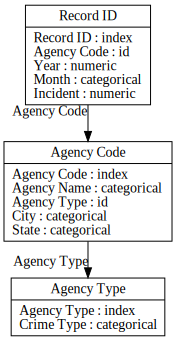

In [5]:
entityset.plot()

In [6]:
import featuretools as ft
fm, features = ft.dfs(entityset=entityset, target_entity='Agency Code')
features

[<Feature: Agency Name>,
 <Feature: Agency Type>,
 <Feature: City>,
 <Feature: State>,
 <Feature: SUM(Record ID.Year)>,
 <Feature: SUM(Record ID.Incident)>,
 <Feature: STD(Record ID.Year)>,
 <Feature: STD(Record ID.Incident)>,
 <Feature: MAX(Record ID.Year)>,
 <Feature: MAX(Record ID.Incident)>,
 <Feature: SKEW(Record ID.Year)>,
 <Feature: SKEW(Record ID.Incident)>,
 <Feature: MIN(Record ID.Year)>,
 <Feature: MIN(Record ID.Incident)>,
 <Feature: MEAN(Record ID.Year)>,
 <Feature: MEAN(Record ID.Incident)>,
 <Feature: COUNT(Record ID)>,
 <Feature: NUM_UNIQUE(Record ID.Month)>,
 <Feature: MODE(Record ID.Month)>,
 <Feature: Agency Type.Crime Type>,
 <Feature: Agency Type.COUNT(Agency Code)>,
 <Feature: Agency Type.NUM_UNIQUE(Agency Code.Agency Name)>,
 <Feature: Agency Type.NUM_UNIQUE(Agency Code.City)>,
 <Feature: Agency Type.NUM_UNIQUE(Agency Code.State)>,
 <Feature: Agency Type.MODE(Agency Code.Agency Name)>,
 <Feature: Agency Type.MODE(Agency Code.City)>,
 <Feature: Agency Type.MODE(Ag